In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_excel('demand_jan_maio.xlsx')
dataset_train.head()

,Consumption,next 8 hour
0,56443,43926.143750
1,51642,43902.985417
2,51757,43891.245833
3,51521,43879.418750
4,51295,43867.204167


In [10]:
training_set = []
Consumption = dataset_train['Consumption']
for i in range(int(len(dataset_train)/15)):
    training_set.append(sum(Consumption[i*15:(i*15)+15]))
217440/15

14496.0

In [11]:
# training_set = dataset_train.iloc[:, 0:1].values


In [12]:
dataset_train.shape

(217440, 2)

In [13]:
dataset_train.head()


,Consumption,next 8 hour
0,56443,43926.143750
1,51642,43902.985417
2,51757,43891.245833
3,51521,43879.418750
4,51295,43867.204167


In [40]:
training_set = np.array(training_set)
training_set.shape

(14496,)

In [60]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set[:10000].reshape(-1,1))
training_set_scaled

array([[0.18681347],
       [0.17009745],
       [0.1627385 ],
       ...,
       [0.0670586 ],
       [0.07460899],
       [0.0863874 ]])

In [61]:
training_set_scaled.shape

(10000, 1)

In [62]:
print(480/15)
3 * 480 / 15

32.0


96.0

In [80]:
minutesAgoUpperBound = 96
minutesAgoLowerBound = 128

featureSize = minutesAgoLowerBound - minutesAgoUpperBound

minutespredict = 1
X_train = []
y_train = []
for i in range(minutesAgoLowerBound, 10000 - minutespredict):
    X_train.append(training_set_scaled[i - minutesAgoLowerBound:i-minutesAgoUpperBound, 0])
    y_train.append(training_set_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(9871, 32, 1)

In [94]:
y_train.shape

array([[0.11493274],
       [0.13653472],
       [0.14551041],
       ...,
       [0.06952247],
       [0.0670586 ],
       [0.07460899]])

In [82]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [83]:
model = Sequential()
model.add(LSTM(units=30,return_sequences=True,input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))
model.add(LSTM(units=30,return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(units=30,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=30))
model.add(Dropout(0.2))
# model.add(Dense(units=minutespredict))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 32, 30)            3840      
                                                                 
 lstm_13 (LSTM)              (None, 32, 30)            7320      
                                                                 
 lstm_14 (LSTM)              (None, 32, 30)            7320      
                                                                 
 dropout_6 (Dropout)         (None, 32, 30)            0         
                                                                 
 lstm_15 (LSTM)              (None, 30)                7320      
                                                                 
 dropout_7 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [67]:
model.fit(X_train,y_train,epochs=100, batch_size=1000)

Epoch 1/100
10/10 [==============================] - 4s 106ms/step - loss: 0.0553
Epoch 2/100
10/10 [==============================] - 1s 104ms/step - loss: 0.0358
Epoch 3/100
10/10 [==============================] - 1s 106ms/step - loss: 0.0332
Epoch 4/100
10/10 [==============================] - 1s 111ms/step - loss: 0.0323
Epoch 5/100
10/10 [==============================] - 1s 113ms/step - loss: 0.0318
Epoch 6/100
10/10 [==============================] - 1s 110ms/step - loss: 0.0311
Epoch 7/100
10/10 [==============================] - 1s 109ms/step - loss: 0.0304
Epoch 8/100
10/10 [==============================] - 1s 107ms/step - loss: 0.0299
Epoch 9/100
10/10 [==============================] - 1s 107ms/step - loss: 0.0289
Epoch 10/100
10/10 [==============================] - 1s 116ms/step - loss: 0.0281
Epoch 11/100
10/10 [==============================] - 1s 118ms/step - loss: 0.0278
Epoch 12/100
10/10 [==============================] - 1s 113ms/step - loss: 0.0276
Epoch 13/100


10/10 [==============================] - 1s 112ms/step - loss: 0.0249
Epoch 100/100
10/10 [==============================] - 1s 122ms/step - loss: 0.0248


In [104]:
# url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
# dataset_test = pd.read_csv(url)
# real_stock_price = dataset_test.iloc[:, 1:2].values
real_Consumption = training_set[10000:]
# real_Consumption = sc.transform(real_Consumption.reshape(-1,1))
real_Consumption

array([609481, 629571, 629000, ..., 876344, 835274, 824022])

In [105]:
# minutespredict = 480
# minutesAgo = 100

In [106]:
# training_set[10000 - minutesAgoLowerBound:].shape

In [107]:
# dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# inputs = dataset_train[len(dataset_total) - len(dataset_test) - 60:].values
inputs = training_set[10000 - minutesAgoLowerBound:]
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(minutesAgoLowerBound, len(inputs)):
    X_test.append(inputs[i-minutesAgoLowerBound:i-minutesAgoUpperBound, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.11168177],
        [0.1034947 ],
        [0.10956434],
        ...,
        [0.06492902],
        [0.05190462],
        [0.06694691]],

       [[0.1034947 ],
        [0.10956434],
        [0.09997174],
        ...,
        [0.05190462],
        [0.06694691],
        [0.05566158]],

       [[0.10956434],
        [0.09997174],
        [0.10514944],
        ...,
        [0.06694691],
        [0.05566158],
        [0.06112571]],

       ...,

       [[0.53439465],
        [0.54041947],
        [0.5118164 ],
        ...,
        [0.2907663 ],
        [0.2941639 ],
        [0.3039548 ]],

       [[0.54041947],
        [0.5118164 ],
        [0.46899763],
        ...,
        [0.2941639 ],
        [0.3039548 ],
        [0.28985916]],

       [[0.5118164 ],
        [0.46899763],
        [0.47263304],
        ...,
        [0.3039548 ],
        [0.28985916],
        [0.30234793]]])

In [108]:
predicted_Consumption = model.predict(X_test)
# predicted_Consumption = sc.inverse_transform(predicted_Consumption)
predicted_Consumption.min()

-0.006691603

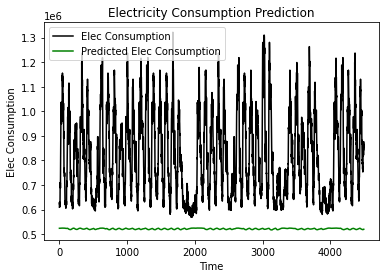

In [109]:
plt.plot(real_Consumption, color = 'black', label = 'Elec Consumption')
plt.plot(sc.inverse_transform(predicted_Consumption), color = 'green', label = 'Predicted Elec Consumption')
plt.title('Electricity Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Elec Consumption')
plt.legend()
plt.show()